## Programming for Data Analysis Project



** Introduction**

The weather, the obsession of all Irish adults. From a conversation starter to the dreaded threat of weddings and summer bar-be-cues.

Meteireann has the dubious task of trying to give accurate and timely forecasts for the nation, while more often than not being the butt of the joke due to each individual taking a wholistic forecast as a personal gaurantee of weather certainty.

The following project is going to analyse the percipitation (Rain Fall) from the Cork Airport weather station in County Cork under the following headings;

- Date
- Percipitation Amount (mm)
- Maximum Air Temperature (C)
- Minimum Air Temperature (C)
- Mean Wind Speed (Knot)
- Wind Direction at Max 10 min Mean (deg)
- Mean CBL Pressure (hpa)


** Aim**

The aim of this project is to explore the creation of an accurate localised weather predictor by investigating if known historical weather characterisitics have a dependency and relationship with each other.


** Method **

By analysing historical weather data and its associated characteristics in relation to percipitation amount it is proposed that if the correct weather characteristics and data for the local area are entered into the model i.e. Ballincollig, County Cork, an accurate determination if percipition (rain) is forecast for your locality will be determined.

As the Cork Airport weather station is the closest weather station with enough variable data to create a model it was used to gather historical data points.

For the purpose of this project random data will be generated using numpy.random to generate a data sets to mimick the characteristics of the variables taken from the Cork Airport weather station. i.e.

- Date
- Percipitation Amount (mm)
- Maximum Air Temperature (C)
- Minimum Air Temperature (C)
- Mean Wind Speed (Knot)
- Wind Direction at Max 10 min Mean (deg)
- Mean CBL Pressure (hpa)


In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
from scipy.stats import kurtosis, skew

**Definition of the Data Frame**

To provide clarity when further analysis is conducted and to be able to differentiate between the original and random data sets we will define the original Cork airport data frame as "CorkAirportData"

In [45]:
CorkAirportData = df
df = pd.read_csv('C://Users//Shane//Desktop//GMIT//meteireann//CorkAirportDataone.txt')

In [46]:
CorkAirportData

,Date,MaxTemp,MinTemp,Rain (mm),Pressure cbl (Hpa),WindSpeed (Knots),Wind Direction (deg)
0,31-Oct-17,12.3,10.0,0.0,1003.7,9.2,220
1,01-Nov-17,12.6,7.8,0.0,998.5,3.8,180
2,02-Nov-17,12.8,7.8,0.2,997.4,4.1,340
3,03-Nov-17,10.0,7.3,0.0,992.5,3.1,260
4,04-Nov-17,9.4,3.4,2.4,991.3,10.2,300
5,05-Nov-17,9.8,4.0,1.1,1000.5,7.8,320
6,06-Nov-17,11.5,5.6,10.6,997.8,12.5,200
7,07-Nov-17,9.7,3.0,2.5,997.2,9.1,330
8,08-Nov-17,10.5,4.0,0.1,1005.2,5.9,300
9,09-Nov-17,12.2,8.7,0.8,1006.8,9.9,310


** Summary Descriptive Statistics for the Data Frame**

To generate random data to match the characteristics of the cork airport weather data I first need to determine the descriptive statistics for the data set. To generate a randm data set that closely aligns to the cork airport data set I am going to calculate the following statistical parameters.

- Mean
- Standard Deviation (std)
- Skewness
- Kurtosis

In [47]:
print ("Cork Airport Data Mean Results")
CorkAirportData.mean()

Cork Airport Data Mean Results


MaxTemp                  13.301366
MinTemp                   6.671858
Rain (mm)                 2.960929
Pressure cbl (Hpa)      995.120765
WindSpeed (Knots)         9.370219
Wind Direction (deg)    228.415301
dtype: float64

In [48]:
print ("Cork Airport Data Standard Deviation Results")
CorkAirportData.std()

Cork Airport Data Standard Deviation Results


MaxTemp                  5.517347
MinTemp                  4.669434
Rain (mm)                5.256508
Pressure cbl (Hpa)      11.382705
WindSpeed (Knots)        3.611673
Wind Direction (deg)    89.321351
dtype: float64

In [49]:
print ("Cork Airport Data Skewness Results")
CorkAirportData.skew()

Cork Airport Data Skewness Results


MaxTemp                 0.175570
MinTemp                -0.028819
Rain (mm)               2.597616
Pressure cbl (Hpa)     -0.594056
WindSpeed (Knots)       0.694846
Wind Direction (deg)   -0.609418
dtype: float64

In [50]:
print ("Cork Airport Data Kurtosis Results")
CorkAirportData.kurtosis()

Cork Airport Data Kurtosis Results


MaxTemp                -0.538643
MinTemp                -0.809285
Rain (mm)               7.324231
Pressure cbl (Hpa)      0.033814
WindSpeed (Knots)       0.133744
Wind Direction (deg)   -0.338251
dtype: float64

In [51]:
print ("Cork Airport Data Min Results")
CorkAirportData.min()

Cork Airport Data Min Results


Date                    01-Apr-18
MaxTemp                      -1.8
MinTemp                        -7
Rain (mm)                       0
Pressure cbl (Hpa)          963.3
WindSpeed (Knots)             2.8
Wind Direction (deg)            0
dtype: object

In [52]:
print ("Cork Airport Data Max Results")
CorkAirportData.max()

Cork Airport Data Max Results


Date                    31-Oct-18
MaxTemp                      26.7
MinTemp                      16.5
Rain (mm)                      31
Pressure cbl (Hpa)         1020.9
WindSpeed (Knots)            23.8
Wind Direction (deg)          360
dtype: object

In [53]:
print ("Cork Airport Data Median Results")
CorkAirportData.median()

Cork Airport Data Median Results


MaxTemp                  12.60
MinTemp                   6.75
Rain (mm)                 0.40
Pressure cbl (Hpa)      996.85
WindSpeed (Knots)         8.90
Wind Direction (deg)    230.00
dtype: float64

** Defining Each Column Within the Cork Airport Data Frame**

To compare the data and graphs of the Cork airport data and the randomly generated data I will define each column within the data frame so it can be graphed. I will use the iloc function to define each column of data so they can be plotted on as subplots on bar chart graphs.

In [54]:
plt.subplot(2,3,1)
MaxTemp=CorkAirportData.iloc[0:365,1]
plt.hist(MaxTemp)
plt.title("MaxTemp")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

In [55]:
plt.subplot(2,3,2)
MinTemp=CorkAirportData.iloc[0:365,2]
plt.hist(MinTemp)
plt.title("MinTemp")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

In [56]:
plt.subplot(2,3,3)
Rain=CorkAirportData.iloc[0:365,3]
plt.hist(Rain)
plt.title("Percipitation (mm)")
plt.xlabel("Qty")
plt.ylabel("Volume")

Text(0,0.5,'Volume')

In [57]:
plt.subplot(2,3,4)
Pressure=CorkAirportData.iloc[0:365,4]
plt.hist(Pressure)
plt.title("Pressure (Hpa)")
plt.xlabel("Qty")
plt.ylabel("Pressure")

Text(0,0.5,'Pressure')

In [58]:
plt.subplot(2,3,5)
WindSpeed=CorkAirportData.iloc[0:365,5]
plt.hist(WindSpeed)
plt.title("Wind Speed (knots)")
plt.xlabel("Qty")
plt.ylabel("Speed Knots")

Text(0,0.5,'Speed Knots')

In [59]:
plt.subplot(2,3,6)
WindDirection=CorkAirportData.iloc[0:365,6]
plt.hist(WindDirection)
plt.title("Wind Direction (deg)")
plt.xlabel("Qty")
plt.ylabel("Wind Direction (deg)")

Text(0,0.5,'Wind Direction (deg)')

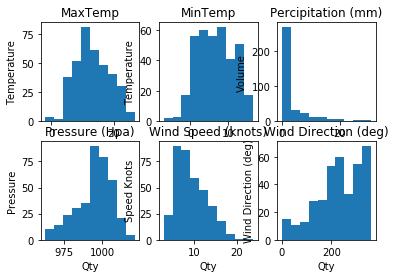

In [60]:
plt.show()

** Generatation of Random Data to Simulation the Cork Airport Weather Data**

To analyse the data and to determine if there is any dependancies between the variables and rainfall, random data will be generated who's distributions approximate the real world weather data from Cork Airport. Below we detail the distributions assigned to each of the weather variables selected and a brief justification for selecting the specific distribution for each variable.
    
       Weather Variable         Designation        Selected Distribution
     - Max Temperature          RandMaxTemp        Normal Distribution
     - Min Temperature          RandMinTemp        Normal Distribution
     - Percipitation            RandRain           Gamma Distribution
     - Pressure                 RandPressure       Gumbel Distribution
     - Wind Speed               RandWindSpeed      Gumbel Distribution
     - Wind Direction           RandWindDir        Gumbel Distribtion
     
As the original data visually illustrated the Max and Min temperatures displayed an approximation to the normal distribution the random data for Max and Min temperatures will be generated following the normal distribution.

On review of literature it was discovered a number of distributions can be used to model percipitation amounts. As the original data set was right skewed the Gamma distribution was selected to model the random data for percipitation (Rain Fall)

All other variables display extreme values and for this reason the Gumbel distributions were selected for them.
     

**RandMaxTemp**

In [61]:
RandMaxTemp=np.random.normal(13.301366,5.517347,365)
plt.subplot(2,3,1)
plt.hist(RandMaxTemp)
plt.title("Daily Max Temperature")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

**RandMinTemp**

In [62]:
RandMinTemp=np.random.normal(6.671858,4.669434,365)
plt.subplot(2,3,2)
plt.hist(RandMinTemp)
plt.title("Daily Min Temperature")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

**RandRain**

In [63]:
RandRain = np.random.gamma(0.4, 5.256508, 365)
plt.subplot(2,3,3)
plt.hist(RandRain)
plt.title("Daily Rain Fall")
plt.xlabel("Amount")
plt.ylabel("Rain mm")

Text(0,0.5,'Rain mm')

**RandPressure**

In [64]:
RandPressure = np.random.gumbel(996.85, 11.382705, 365)
plt.subplot(2,3,4)
plt.hist(RandPressure)
plt.title("Daily Pressure")
plt.xlabel("Pressure")
plt.ylabel("Pressure Frequency Hpa")

Text(0,0.5,'Pressure Frequency Hpa')

**RandWindSpeed**

In [65]:
RandWindSpeed = np.random.gumbel(8.9, 3.611673, 365)
plt.subplot(2,3,5)
plt.hist(RandWindSpeed)
plt.title("Daily Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Speed Frequency Knots")

Text(0,0.5,'Wind Speed Frequency Knots')

**RandWindDir**

In [66]:
RandWindDir = np.random.gumbel(230, 89.321351, 365)
plt.subplot(2,3,6)
plt.hist(RandWindDir)
plt.title("Daily Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Wind Direction Degs")

Text(0,0.5,'Wind Direction Degs')

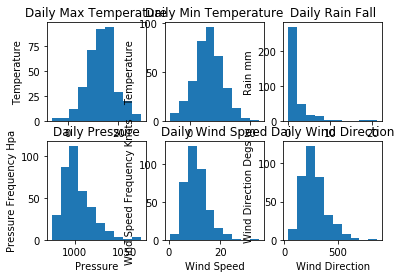

In [67]:
plt.show()

**Random Data, Data Frame Creation**

Now that we have created random data to simulate the real world weather data from Cork airport, we will create a data from to store our results.

I will define and name the data frame RanWeatherData to differenciate from the original data set from Cork airport.

In [78]:
RanWeatherData = df
df = pd.DataFrame({"Random Max Temp":RandMaxTemp, "Random Min Temp": RandMinTemp, "Random Rain": RandRain, "Random Pressure": RandPressure, "Random Wind Speed": RandWindSpeed, "Random Wind Direction": RandWindDir})

In [79]:
RanWeatherData

,Random Max Temp,Random Min Temp,Random Pressure,Random Rain,Random Wind Direction,Random Wind Speed
0,3.173445,8.622670,1020.969788,0.001267,331.950034,19.143916
1,8.641584,5.768477,990.750482,6.038176,246.477464,16.887401
2,9.154728,6.750109,990.289200,0.004709,299.667593,18.203581
3,16.775925,1.217026,1001.975737,1.538300,226.650278,9.878761
4,17.802543,2.393341,1010.412168,0.081469,199.176069,20.387636
5,-6.346013,5.165284,985.001679,2.497230,403.034793,12.765451
6,8.687402,5.605763,997.618538,17.293999,175.179637,9.870510
7,16.775334,0.671322,997.043100,0.163705,245.538974,8.555781
8,11.528525,17.784707,995.190819,0.131327,289.133389,13.357329
9,19.704246,9.454223,1026.607489,2.144396,154.229010,14.154126


** Comparison of Original Data and Random Generated Data** 

To compare and contrast the original Cork Airport weather data and the random generated data, I will generate box plots to compare and contrast the data sets. The box plot will allow a standardized way of displaying the distribution of the data based on five descriptive statistics, namely minimum value, first quartile, median value, third quartile, and maximum value. 

In [104]:
plt.subplot(1,2,1)
MaxTempBoxPlot=[RandMaxTemp, MaxTemp]
plt.title("Max Temperature Comparison")
plt.boxplot(MaxTempBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Temperature')
plt.xticks([1, 2], ['RandMaxTemp', 'MaxTemp'])

([<matplotlib.axis.XTick at 0x267d98dc3c8>,
 <a list of 2 Text xticklabel objects>)

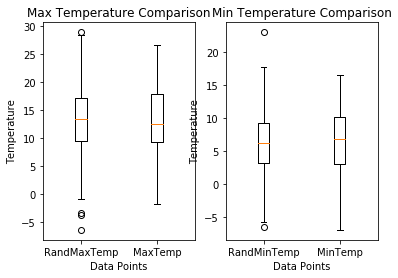

In [105]:
plt.subplot(1,2,2)
MinTempBoxPlot=[RandMinTemp, MinTemp]
plt.title("Min Temperature Comparison")
plt.boxplot(MinTempBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Temperature')
plt.xticks([1, 2], ['RandMinTemp', 'MinTemp'])
plt.show()

In [108]:
PressureBoxPlot=[]
plt.title("Pressire Comparison")
plt.boxplot(PressureBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Pressure')
plt.xticks([1, 2], ['Randpm Pressure', 'Pressure'])
plt.sho()

SyntaxError: invalid syntax (<ipython-input-108-c6ecd381a550>, line 1)

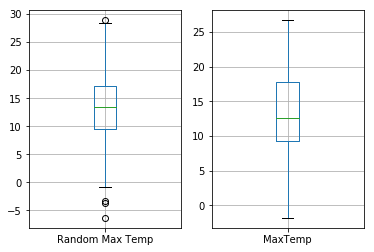